# Data Dictionary

# 0.0 Imports

In [1]:
import pandas as pd
import inflection
from src import GeneralUtils  as gu
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm
import numpy as np

from sklearn.cluster import KMeans, DBSCAN
import sklearn.metrics as mt
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import sklearn.manifold as man
#import umap as um
import umap.umap_ as um

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
e:\users\b_tc\anaconda3\envs\churnenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sns.set_style('darkgrid')

# 0.1 Load Data

In [3]:
df_raw = pd.read_csv('../data/raw/Ecommerce.csv', encoding='ISO-8859-1')

In [4]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 1.0. Data Description

In [5]:
df_description = df_raw.drop('Unnamed: 8', axis=1)

In [6]:
df_description.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 1.1. Renaming Columns

In [7]:
old_cols = ['InvoiceNo', 'StockCode', 'Description', 'Quantity','InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

snakecase = lambda x: inflection.underscore(x)
new_cols = list(map(snakecase, old_cols))

df_description.columns = new_cols

In [8]:
df_description['description'] = df_description['description'].str.lower()

In [9]:
df_description.sort_values('invoice_date')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
143377,548698,84988,set of 72 pink heart paper doilies,2,1-Apr-17,1.45,18109.0,United Kingdom
143732,548711,20752,blue polkadot washing up gloves,1,1-Apr-17,2.10,18116.0,United Kingdom
143733,548711,22719,gumball monochrome coat rack,1,1-Apr-17,1.25,18116.0,United Kingdom
143734,548711,22467,gumball coat rack,4,1-Apr-17,2.55,18116.0,United Kingdom
143735,548711,85014A,black/blue polkadot umbrella,1,1-Apr-17,5.95,18116.0,United Kingdom
...,...,...,...,...,...,...,...,...
334723,566267,23293,set of 12 fairy cake baking cases,8,9-Sep-17,0.83,12647.0,Germany
334722,566267,23296,set of 6 tea time baking cases,8,9-Sep-17,1.25,12647.0,Germany
334721,566267,23295,set of 12 mini loaf baking cases,8,9-Sep-17,0.83,12647.0,Germany
334734,566268,22189,cream heart card holder,4,9-Sep-17,3.95,13813.0,Germany


## 1.2. Data Dimension

In [10]:
print(f'Number of Rows: {df_description.shape[0]}')
print(f'Number of Columnss: {df_description.shape[1]}')

Number of Rows: 541909
Number of Columnss: 8


## 1.3. Data Types & Missing Values

In [11]:
gu.sum_table(df_description)

,Name,dtypes,Uniques,Missing,Missing %
0,invoice_no,object,25900,0,0.00
1,stock_code,object,4070,0,0.00
2,description,object,4206,1454,0.27
3,quantity,int64,722,0,0.00
4,invoice_date,object,305,0,0.00
5,unit_price,float64,1630,0,0.00
6,customer_id,float64,4372,135080,24.93
7,country,object,38,0,0.00


## 1.4.  Handling Missing Values

Checking if there are invoice number of elements with missing customer ID in other part of the dataset, so we can fill the missing values.

In [12]:
invoice_no_of_missing_customer_ids = df_description.query('customer_id.isnull()').invoice_no.values
df_description.loc[df_description.invoice_date.isin(invoice_no_of_missing_customer_ids)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country


There are no invoice numbers in other parts of the dataset. So, in this cycle, I opted to remove the NAs and see how the model performs. In another cycle, I will find other ways to treat this.

In [13]:
# description
df_description = df_description.dropna(subset=['description', 'customer_id'], axis=0)
print(f'Removed data: {1 - (df_description.shape[0]/df_raw.shape[0]):.2%}')

Removed data: 24.93%


In [14]:
df_description.isnull().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.5. Fixing Data Types

In [15]:
df_description.invoice_date = pd.to_datetime(df_description.invoice_date)
df_description.customer_id = df_description.customer_id.astype(int)

In [16]:
df_description.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,white hanging heart t-light holder,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2016-11-29,3.39,17850,United Kingdom


In [17]:
df_description.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 1.6. Descriptive Statistics

In [18]:
num_att = df_description.select_dtypes(include=['float64', 'int64'])

In [19]:
num_att.agg(['min', 'max', 'ptp', 'mean', 'median', 'var', 'std', 'skew', 'kurtosis']).T.reset_index().rename(columns={'index': 'Attributes', 'ptp': 'range'})

,Attributes,min,max,range,mean,median,var,std,skew,kurtosis
0,quantity,-80995.0,80995.0,161990.0,12.061303,5.00,61848.392291,248.693370,0.182663,94317.563673
1,unit_price,0.0,38970.0,38970.0,3.460471,1.95,4804.591645,69.315162,452.219019,246924.542988


**Correcting negative values in quantity variable**

In [20]:
#df_description.quantity = df_description.quantity.apply(lambda x: -x if x < 0 else x)

In [21]:
df_description.quantity.min()

-80995

In [22]:
df_description.describe([0.01, 0.05, 0.10, 0.20, 0.80, 0.90, 0.95, 0.99, 0.997])[['quantity', 'unit_price']].T

,count,mean,std,min,1%,5%,10%,20%,50%,80%,90%,95%,99%,99.7%,max
quantity,406829.0,12.061303,248.693370,-80995.0,-2.00,1.00,1.00,1.00,5.00,12.00,24.00,36.0,120.0,271.032,80995.0
unit_price,406829.0,3.460471,69.315162,0.0,0.21,0.42,0.55,0.85,1.95,4.15,6.75,8.5,15.0,24.950,38970.0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 2.0. Feature Engineering

In [23]:
df_feature = df_description.copy()

In [24]:
df_feature['gross_revenue'] = df_feature.quantity * df_feature.unit_price

# Recency
diff = df_feature.invoice_date.max() - df_feature.groupby('customer_id').max()['invoice_date']
recency = pd.DataFrame(diff).reset_index().rename(columns={'invoice_date': 'recency'})

recency['recency'] = recency['recency'].dt.days
df_feature = df_feature.merge((recency), how='left', on='customer_id')


# Frequency
frequency = df_feature.groupby('customer_id').nunique()[['invoice_no']].reset_index().rename(columns={'invoice_no': 'frequency'})
df_feature = df_feature.merge((frequency), how='left', on='customer_id')

# Monetary
monetary = df_feature.groupby('customer_id').sum(numeric_only=True).gross_revenue.reset_index().rename(columns={'gross_revenue': 'monetary'})
df_feature = df_feature.merge((monetary), how='left', on='customer_id')

In [25]:
avg_ticket = df_feature.groupby('customer_id').mean(numeric_only=True).gross_revenue.reset_index().rename(columns={'gross_revenue': 'avg_ticket'})

df_feature = df_feature.merge((avg_ticket), how='left', on='customer_id')

In [26]:
df_feature.isna().sum()

invoice_no       0
stock_code       0
description      0
quantity         0
invoice_date     0
unit_price       0
customer_id      0
country          0
gross_revenue    0
recency          0
frequency        0
monetary         0
avg_ticket       0
dtype: int64

In [27]:
df_customers = df_feature.drop_duplicates('customer_id')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 3.0. Variables Filtering

In [28]:
df_rfm = df_feature.drop_duplicates('customer_id').copy()[['customer_id', 'recency', 'frequency', 'monetary', 'avg_ticket']]
df_rfm.head()

,customer_id,recency,frequency,monetary,avg_ticket
0,17850,302,35,5288.63,16.950737
9,13047,31,18,3079.10,15.709694
26,12583,2,18,7187.34,28.634821
46,13748,95,5,948.25,33.866071
65,15100,330,6,635.10,105.850000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 4.0. Exploratory Data Analysis

In [67]:
df_eda = df_rfm.copy()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 5.0. Data Preparation

In [68]:
df_prep = df_eda.copy()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 6.0. Feature Selection

In [69]:
df_fselect = df_prep.copy()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 7.0. Hyperparameter Fine-Tuning

In [70]:
df_k = df_fselect.drop(columns=['customer_id']).copy()

In [71]:
clusters = [2, 3, 4, 5, 6]

## 7.1 Within-Cluster Sum of Squares (WSS)

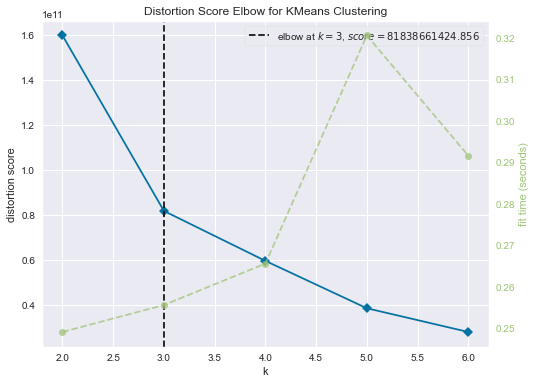

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [72]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

vis = KElbowVisualizer(kmeans, k=clusters, timing=False)
vis.fit(df_k)
vis.show()



## 7.2 Sillhoutte Score

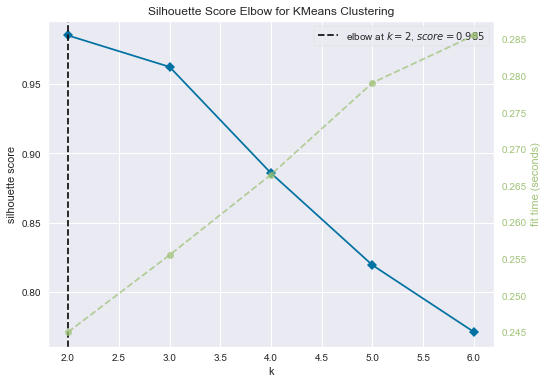

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [73]:
plt.figure(figsize=(8, 6))
kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

vis = KElbowVisualizer(kmeans, k=clusters, metric='silhouette', timing=False)
vis.fit(df_k)
vis.show()



## 7.3 Sillhoutte Analysis

<Figure size 720x432 with 0 Axes>

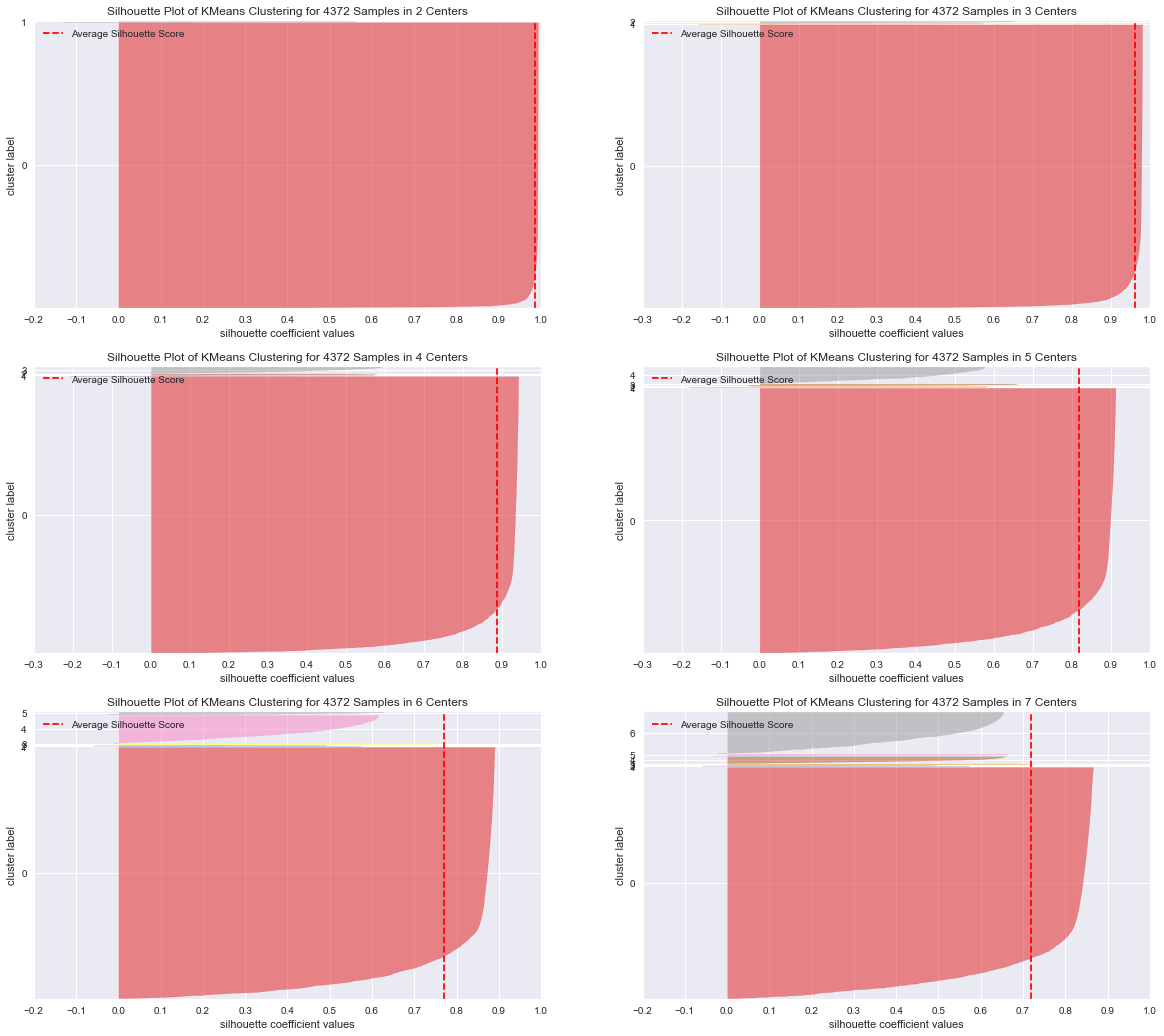

In [85]:
plt.figure(figsize=(10, 6))
n_clusters = [2, 3, 4, 5, 6, 7]
fig, ax = plt.subplots(3, 2, figsize=(20, 18))

for k in n_clusters:
    q, mod = divmod(k, 2)
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    vis = SilhouetteVisualizer(kmeans, color='yellowbricks', ax=ax[q-1][mod])
    vis.fit(df_k)
    vis.finalize()



![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 8.0. Model Training

## 8.1. K-Means

In [136]:
# model
n_cluster=4
kmeans = KMeans(init='random', n_clusters=n_cluster, n_init=10, max_iter=300, random_state=42)

# model training
labels = kmeans.fit_predict(df_k)
ss = mt.silhouette_score(df_k, labels)
wss = kmeans.inertia_

print(f'Silhouette Score: {ss}')
print(f'Within CLuster Sum of Squares: {wss}')

Silhouette Score: 0.8858030127820138
Within CLuster Sum of Squares: 59628546856.1968


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 9.0. Cluster Analysis

## 9.1. Visualization

In [137]:
cluster_df = df_fselect.copy()

cluster_df['cluster'] = labels

e:\users\b_tc\anaconda3\envs\churnenv\lib\site-packages\sklearn\base.py:420: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



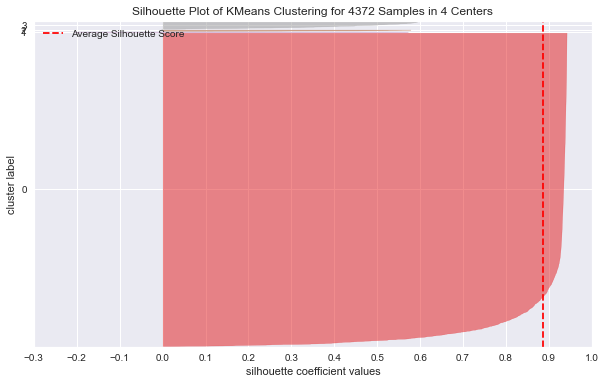

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 4372 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [138]:
plt.figure(figsize=(10, 6))
vis = SilhouetteVisualizer(kmeans, color='yellowbricks')
vis.fit(df_k)
vis.show()

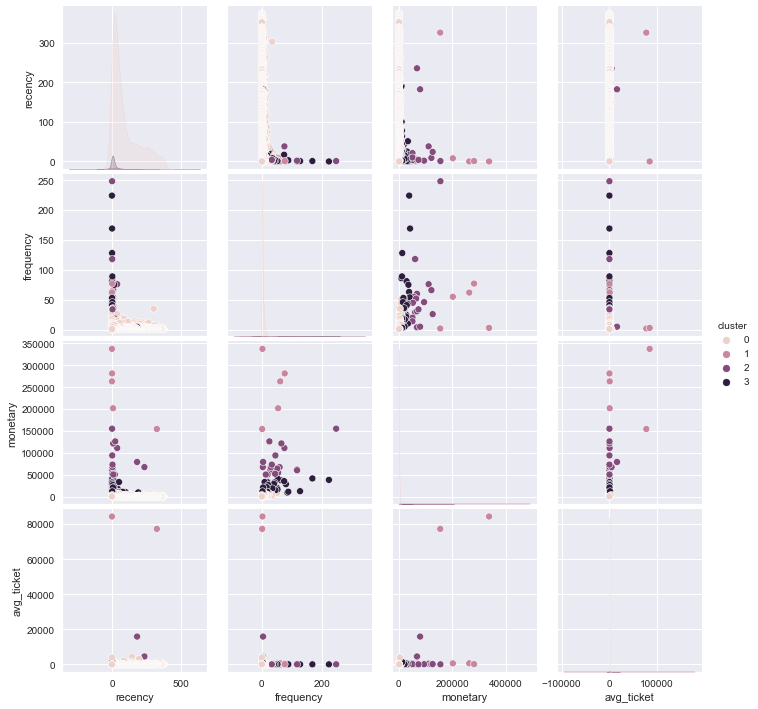

In [139]:
sns.pairplot(cluster_df.drop(columns='customer_id'), hue='cluster')

In [147]:
X = df_k.copy()

# TSNE
tsne = man.TSNE(random_state=42)

features_tsne = tsne.fit_transform(X)


# UMAP

u_map = um.UMAP(n_neighbors=30, random_state=42)

X_umap = u_map.fit_transform(X)
## TSNE
#tsne_scaled = man.TSNE(random_state=42)
#
#features_tsne_scaled = tsne.fit_transform(X_scaled)

In [120]:
#n_cluster=4
#kmeans_tsne = KMeans(init='random', n_clusters=n_cluster, n_init=10, max_iter=300, random_state=42)
# model training
#labels_tsne = kmeans_tsne.fit_predict(features_tsne)
#ss = mt.silhouette_score(features_tsne, labels_tsne)
#wss = kmeans.inertia_
#
#print(f'Silhouette Score: {ss}')
#print(f'Within CLuster Sum of Squares: {wss}')

Silhouette Score: 0.4357014298439026
Within CLuster Sum of Squares: 81838661424.85591


<AxesSubplot:>

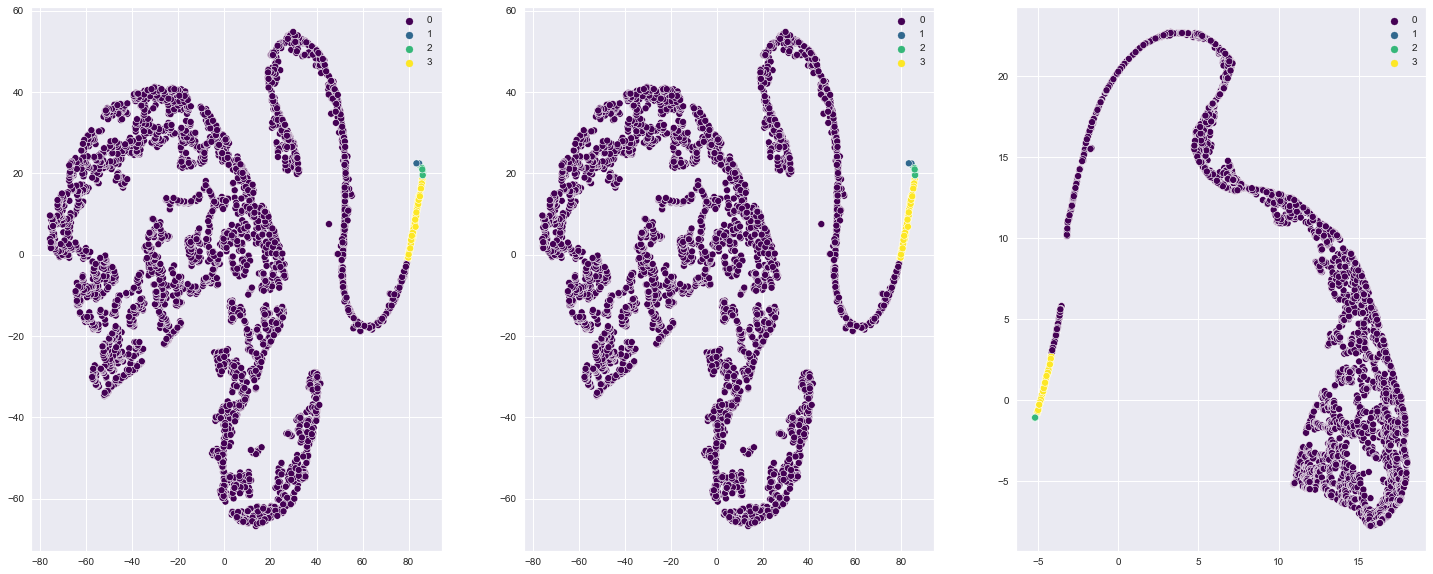

In [148]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=labels, palette='viridis')

plt.subplot(1, 3, 2)
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=labels, palette='viridis')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='viridis')

In [122]:
#df_aux['cluster_tsne'] = labels_tsne

In [144]:
px.scatter_3d(x='recency', y='frequency', z='monetary', color='cluster', data_frame=df_aux)

## 9.2. Clusters Profile

In [145]:
prof = cluster_df.groupby('cluster').count()['customer_id'].reset_index()
prof['percentual'] = (cluster_df.groupby('cluster').count()['customer_id']/cluster_df.shape[0])*100
prof['avg_recency'] = cluster_df.groupby('cluster').mean()['recency']
prof['avg_frequency'] = cluster_df.groupby('cluster').mean()['frequency']
prof['avg_monetary'] = cluster_df.groupby('cluster').mean()['monetary']
prof['avg_ticket'] = cluster_df.groupby('cluster').mean()['avg_ticket']

In [146]:
prof

,cluster,customer_id,percentual,avg_recency,avg_frequency,avg_monetary,avg_ticket
0,0,4249,97.186642,93.725582,4.192987,1227.293333,32.304458
1,1,5,0.114364,66.800000,39.800000,247345.568000,32547.075743
2,2,18,0.411711,30.500000,58.166667,78775.652778,1305.912291
3,3,100,2.287283,12.700000,31.280000,16532.910300,88.273533


## 9.3 Report

Cluster 1

    - Number of Customers: 6
    - Percentage of Customers: 0.14%
    - Average Recency: 7.2 
    - Average Frequency: 89
    - Average Monetary: 182,181.98

Cluster 2

    - Number of Customers: 31
    - Percentage of Customers: 0.71%
    - Average Recency: 14 
    - Average Frequency: 53.3
    - Average Monetary: 40,543.52

Cluster 0

    - Number of Customers: 4335
    - Percentage of Customers: 99.15%
    - Average Recency: 92.26 
    - Average Frequency: 4.6
    - Average Monetary: 1,372.58

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 10.0. Deploy to Production